In [ ]:
# Import necessary libraries
!pip install mixed-naive-bayes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from mixed_naive_bayes import MixedNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

### Load the dataset

In [ ]:
# Load the dataset "travel-insurance.csv"
df = pd.read_csv("travel-insurance.csv")
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


Here follows the list of columns in the dataset:

* Age - Age of the customer
* Employment Type - The sector in which customer is employed
* GraduateOrNot - Whether the customer is college graduate or not
* AnnualIncome - The yearly income of the customer in indian rupees
* FamilyMembers - Number of members in customer's family
* ChronicDisease - Whether the customer suffers from any major disease or conditions like diabetes/high BP or asthama, etc.
* FrequentFlyer - Derived data based on customer's history of booking air tickets on atleast 4 different instances in the last 2 Years (2017-2019).
* EverTravelledAbroad - Has the customer ever travelled to a foreign country.
* TravelInsurance: (label) Did the customer buy travel insurance package during introductory offering held in the year 2019.

### Analyze the Dataset

In [ ]:
# See brief information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [ ]:
# See brief description of the dataset
df.describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [ ]:
# Check for null values
df.isnull().sum().any

<bound method NDFrame._add_numeric_operations.<locals>.any of Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64>

In [ ]:
# See unique elements in object columns
column_keys=df.select_dtypes(include=['object']).columns.tolist()
for key in column_keys:
  print('Unique elements of',key,'are: ')
  print(df[key].unique(), end='\n')
  print(end='\n')

Unique elements of Employment Type are: 
['Government Sector' 'Private Sector/Self Employed']

Unique elements of GraduateOrNot are: 
['Yes' 'No']

Unique elements of FrequentFlyer are: 
['No' 'Yes']

Unique elements of EverTravelledAbroad are: 
['No' 'Yes']



In [ ]:
# Use one-hot encoding on categorical data:
categorical_col = ["Employment Type", "GraduateOrNot", "FrequentFlyer", "EverTravelledAbroad"] # Pick out categorical columns
data = pd.get_dummies(data=df, columns = categorical_col, drop_first=True)

# Showcase the data with dummies variables
data.head()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance,Employment Type_Private Sector/Self Employed,GraduateOrNot_Yes,FrequentFlyer_Yes,EverTravelledAbroad_Yes
0,0,31,400000,6,1,0,0,1,0,0
1,1,31,1250000,7,0,0,1,1,0,0
2,2,34,500000,4,1,1,1,1,0,0
3,3,28,700000,3,1,0,1,1,0,0
4,4,28,700000,8,1,0,1,1,1,0


In [ ]:
# Drop irrelevant columns for data analytics and building model
data = data.drop(["Unnamed: 0"], axis = 1)

# Showcase the adjusted data
data.head()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance,Employment Type_Private Sector/Self Employed,GraduateOrNot_Yes,FrequentFlyer_Yes,EverTravelledAbroad_Yes
0,31,400000,6,1,0,0,1,0,0
1,31,1250000,7,0,0,1,1,0,0
2,34,500000,4,1,1,1,1,0,0
3,28,700000,3,1,0,1,1,0,0
4,28,700000,8,1,0,1,1,1,0


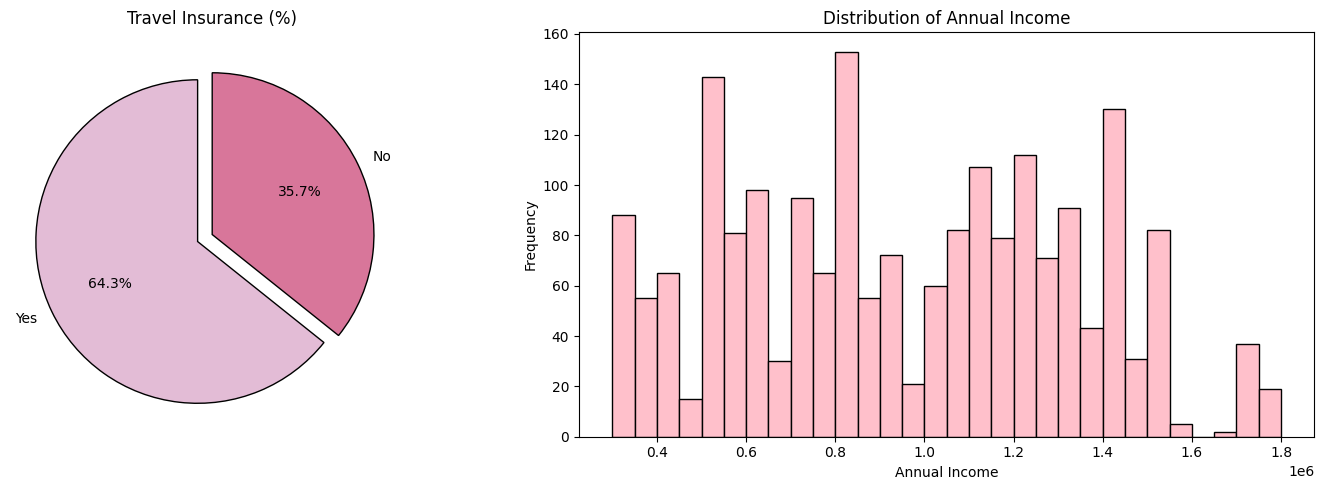

In [ ]:
# See the statistics on travel insurance using pie chart
insurance = list(data["TravelInsurance"].value_counts())
yes, no = insurance[0], insurance[1]  # Set customers with travel insurance as "yes", and those without travel insurance as "no"

total_customer = sum(insurance)
insurance_percent = [yes/total_customer*100, no/total_customer*100]  # Calculate the percentage of each type

# Create a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot the pie chart
axs[0].pie(insurance_percent,
           labels=["Yes", "No"],
           autopct='%1.1f%%',
           startangle=90,
           explode=(0.1, 0),
           colors=["#E3BCD6", "#D8769A"],
           wedgeprops={'edgecolor': 'black'}
           )
axs[0].set_title("Travel Insurance (%)")

# Plot the histogram on Annual Income
axs[1].hist(data['AnnualIncome'], bins=30, color='pink', edgecolor='black')
axs[1].set_xlabel("Annual Income")
axs[1].set_ylabel("Frequency")
axs[1].set_title("Distribution of Annual Income")

# Adjust layout for better spacing
plt.tight_layout()

# Show the combined plot
plt.show()


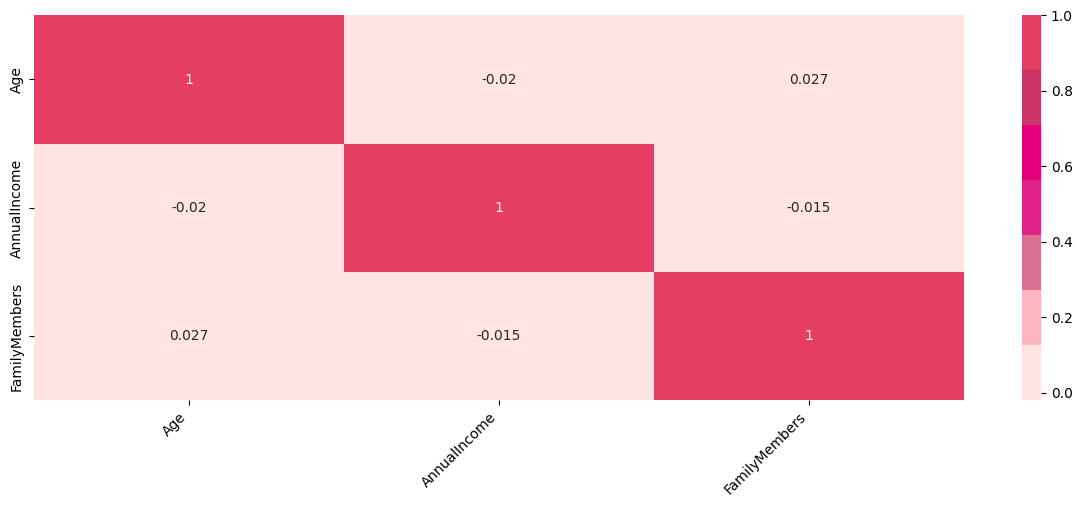

In [ ]:
#Create heatmap to see the correlations of continuous variables in the data
plt.figure(figsize = (15,5))
sns.heatmap(data[["Age", "AnnualIncome", "FamilyMembers"]].corr(),
            cmap = ['#ffe4e1', '#ffb6c1', '#db7093', '#e0218a', '#e4007c', '#cc3366', '#e63e62'],
            annot = True
            )
plt.xticks(rotation = 45, ha = 'right');

### Split the dataset into training, validation and test set

In [ ]:
# Assign data feature values to variable X
feature_names = data.columns.tolist()
feature_names.remove("TravelInsurance")
X = data[feature_names].values

# Assign data label values to variable y
y = data.TravelInsurance.values

In [ ]:
# Show data feature shape and data label shape:
print("Data feature shape is: ", X.shape)
print("Data label shape is:   ", y.shape)

Data feature shape is:  (1987, 8)
Data label shape is:    (1987,)


In [ ]:
# Split the data into train/test set using sklearn library
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [ ]:
# Standardize the first three columns (continuous variables) of the data using StandardScaler
normalizer = StandardScaler()

# Fit and transform the first three columns of the training data
X_normal_train = X_train.copy()
X_normal_train[:, :3] = normalizer.fit_transform(X_train[:, :3])

# Transform the first three columns of the validation data using the learned scaling parameters
X_normal_val = X_val.copy()
X_normal_val[:, :3] = normalizer.transform(X_val[:, :3])

# Transform the first three columns of the test data using the learned scaling parameters
X_normal_test = X_test.copy()
X_normal_test[:, :3] = normalizer.transform(X_test[:, :3])

### Train a Gaussian Naive Bayes

In [ ]:
# Merge training and validation sets
X_train_val, y_train_val = np.vstack((X_train, X_val)), np.concatenate((y_train, y_val))
X_normal_train_val, y_normal_train_val = np.vstack((X_normal_train, X_normal_val)), np.concatenate((y_train, y_val))

In [ ]:
# Initialize Gaussian Naive Bayes model
gnb_model = GaussianNB()

# Define hyperparameter space
param_grid = {'var_smoothing': np.logspace(0, -9, num=10)}
# Train the model using GridSearchCV
grid = GridSearchCV(gnb_model, param_grid, cv = 5)

# Fit the model for grid search
grid.fit(X_normal_train_val, y_normal_train_val)

# Print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_normal_test)

{'var_smoothing': 1.0}


### Train a Mixed Naive Bayes model

In [ ]:
# Initialize Mixed Naive Bayes model
mixed_model = MixedNB()

# Train the model
mixed_model.fit(X_train_val, y_train_val)

# Predict using the model
mixed_predictions = mixed_model.predict(X_test)

### Evaluate and compare the model performance of GaussianNB and MixedNB on the test set using the following metrics: precision, recall, f1-score.

In [ ]:
# Define a function to evaluate and compare the performance
def evaluate_and_compare (model_1, model_2, metric_name, metric, prediction_1, prediction_2, y):
  print(f"The {metric_name} of {model_1} is: ", metric(prediction_1, y))
  print(f"The {metric_name} of {model_2} is: ", metric(prediction_2, y))
  if metric(prediction_1, y) > metric(prediction_2, y):
    print(f"The {metric_name} of {model_1} is higher than the {metric_name} of {model_2}")
  else:
    print(f"The {metric_name} of {model_1} is lower than the {metric_name} of {model_2}")

# Precision score
evaluate_and_compare("GaussianNB", "MixedNB", "precision score", precision_score, grid_predictions, mixed_predictions, y_test)
print()

# Recall score
evaluate_and_compare("GaussianNB", "MixedNB", "recall score", recall_score, grid_predictions, mixed_predictions, y_test)
print()

# F1-score
evaluate_and_compare("GaussianNB", "MixedNB", "f1-score", f1_score, grid_predictions, mixed_predictions, y_test)

The precision score of GaussianNB is:  0.47586206896551725
The precision score of MixedNB is:  0.5103448275862069
The precision score of GaussianNB is lower than the precision score of MixedNB

The recall score of GaussianNB is:  0.92
The recall score of MixedNB is:  0.7789473684210526
The recall score of GaussianNB is higher than the recall score of MixedNB

The f1-score of GaussianNB is:  0.6272727272727273
The f1-score of MixedNB is:  0.6166666666666667
The f1-score of GaussianNB is higher than the f1-score of MixedNB
